In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\dilip-k\\MachineLearning_Models\\bank.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# seperate the categorical variables
categorical = [var for var in df.columns if df.dtypes[var] == 'O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are :",categorical)

There are 10 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [7]:
for col in categorical:
    print(df[col].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64
no     4000
yes     521
Name: y, dtype: int64

In [8]:
#numerical variables
numerical = [var for var in df.columns if df.dtypes[var] != 'O']

In [9]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda

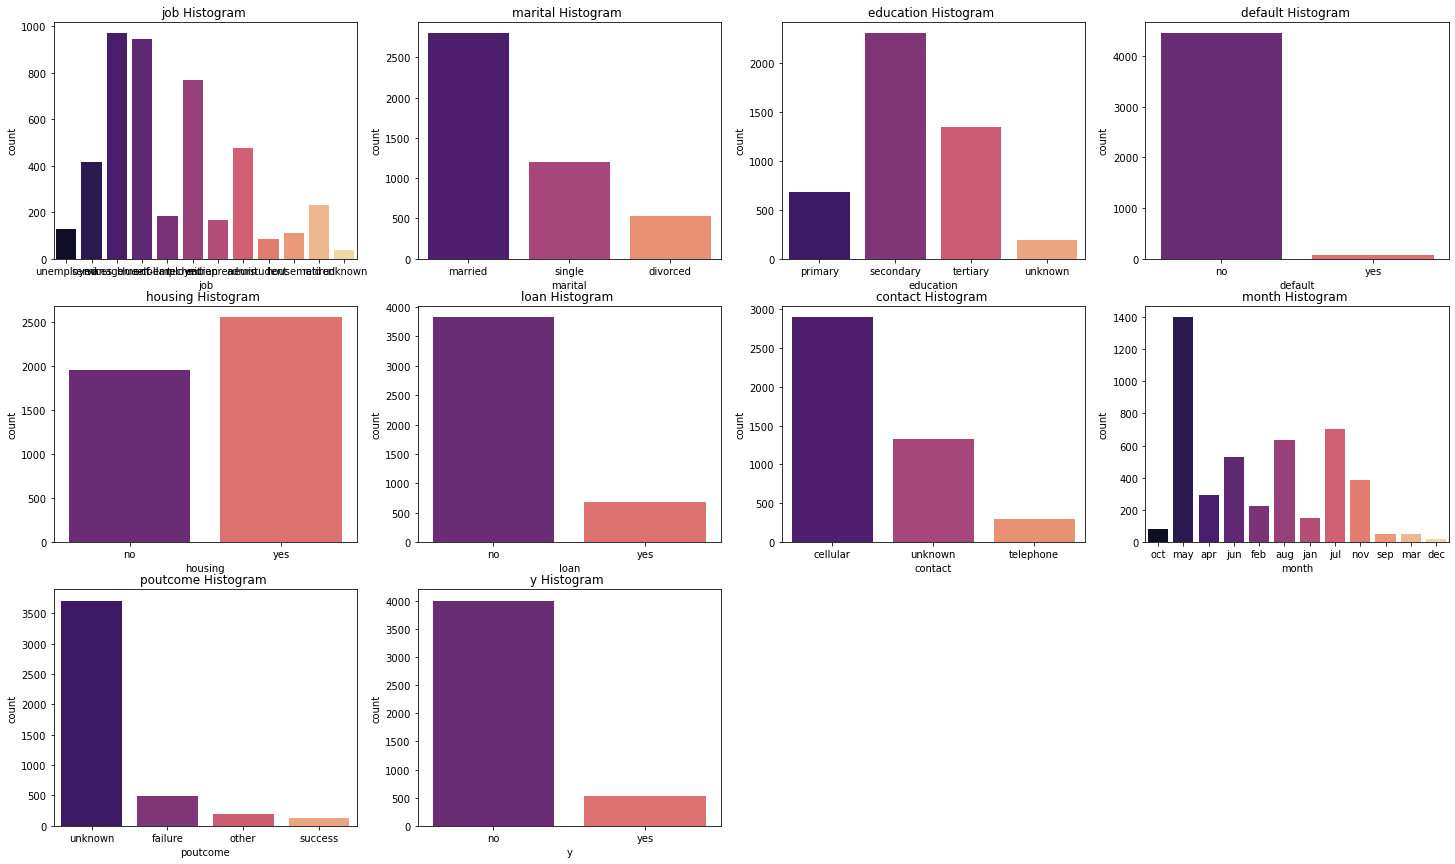

In [10]:
#Exploratory data analysis
# draw bar plot / count plot consolidated for all categorical variables
def plot_count(x,fig):
    plt.subplot(4,4,fig)
    plt.title(x+' Histogram ')
    sns.countplot(df[x], palette = ('magma'))
   
plt.figure(figsize=(25,20))

for i in range(len(categorical)):
    plot_count(categorical[i],i+1)

    

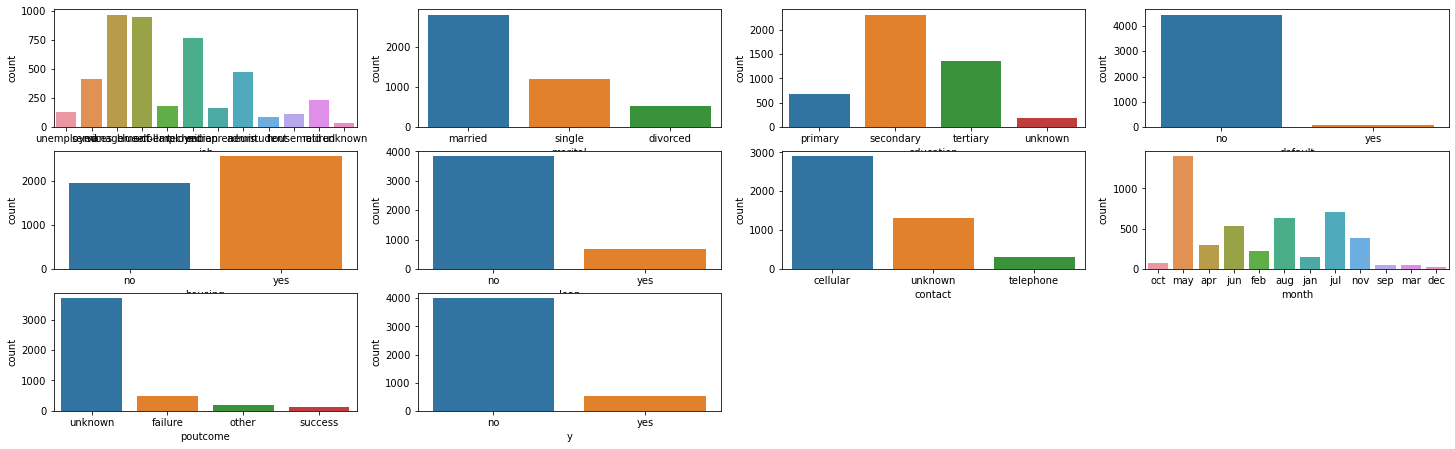

In [11]:
#Exploratory Data Analysis EDA
# Bar plot of numerical value using sns.countplot
#draw consolidated countplot for all categorical variables
f = plt.figure(figsize=(25,10))
for col in categorical:
    plt.subplot(4,4,categorical.index(col) + 1)
    sns.countplot(x=col,data=df)
    

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

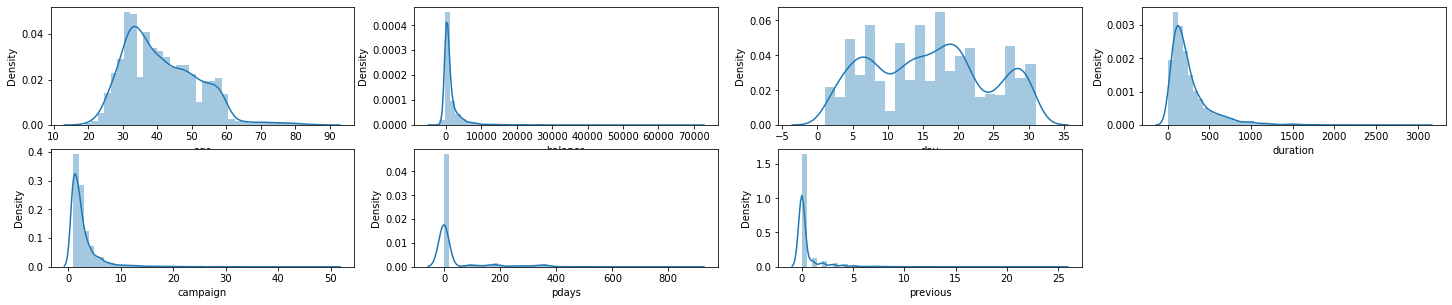

In [12]:
#['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
#sns.distplot(df['previous'])
# Dist plot
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col) + 1)
    sns.distplot(df[col])

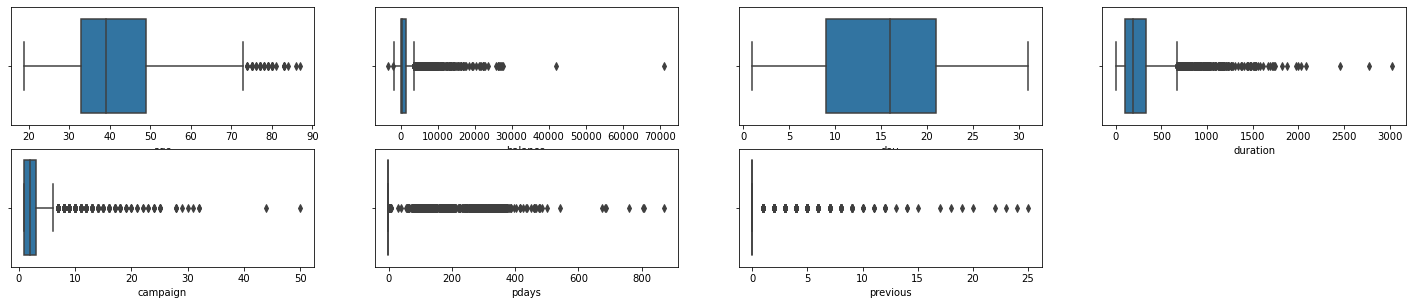

In [13]:
# Box plot
#sns.boxplot(x='age',data=df)
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col) + 1)
    sns.boxplot(x=col,data=df)

<AxesSubplot:>

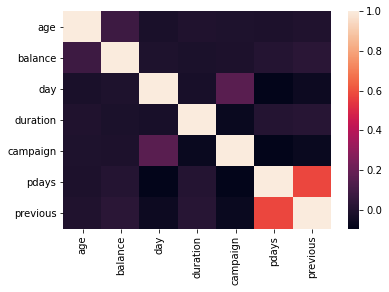

In [14]:
#correlation matrix
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

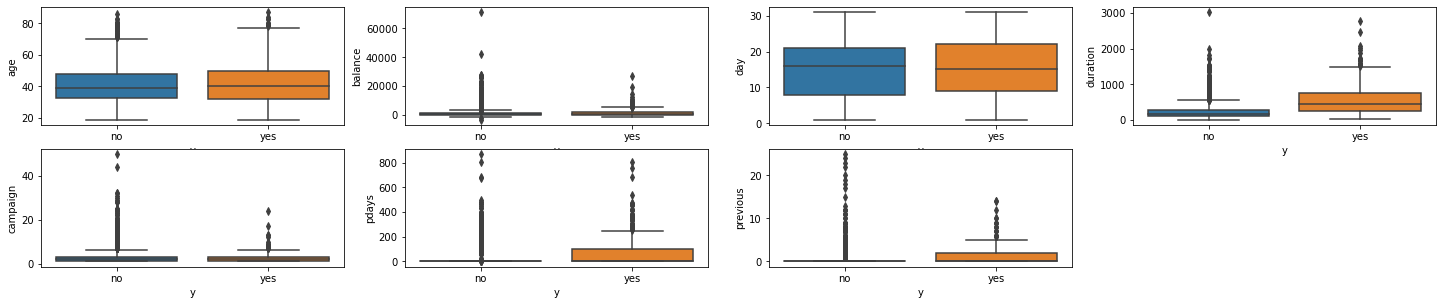

In [15]:
# categorical vs numerical variable
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col) + 1)
    sns.boxplot(x='y',y=col,data=df)

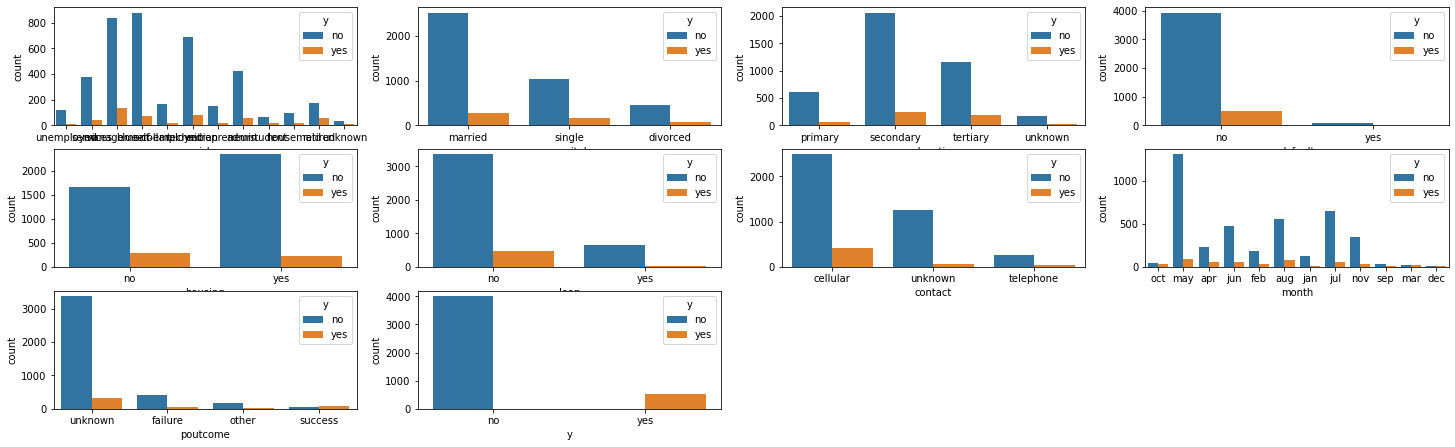

In [16]:
# categorical vs categorical
f = plt.figure(figsize=(25,10))
for col in categorical:
    plt.subplot(4,4,categorical.index(col) + 1)
    sns.countplot(x=col,hue = 'y', data=df)

In [17]:
#check for null values
df.isnull().values.any()

False

In [18]:
#calculate IQR for numerical variable
for col in numerical:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    Lower_fence = df[col].quantile(0.25) - (IQR * 3)
    Upper_fence = df[col].quantile(0.75) + (IQR * 3)
    print('{Column} outliers are values < {lowerboundary} or > {upperboundary}'.format(Column=col,
                                                                                      lowerboundary=Lower_fence,
                                                                                      upperboundary=Upper_fence))

age outliers are values < -15.0 or > 97.0
balance outliers are values < -4164.0 or > 5713.0
day outliers are values < -27.0 or > 57.0
duration outliers are values < -571.0 or > 1004.0
campaign outliers are values < -5.0 or > 9.0
pdays outliers are values < -1.0 or > -1.0
previous outliers are values < 0.0 or > 0.0


In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
X = df.drop(['y'], axis = 1)
y = df['y']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [26]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [27]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
565,40,1,0,0,0,0,0,0,0,0,...,0,0,194,1,247,1,1,0,0,0
3480,47,0,1,0,0,0,0,0,0,0,...,0,0,91,1,-1,0,0,1,0,0
2125,52,1,0,0,0,0,0,0,0,0,...,0,0,89,1,-1,0,0,1,0,0
3452,31,0,0,1,0,0,0,0,0,0,...,0,0,82,5,-1,0,0,1,0,0
1667,33,0,0,0,1,0,0,0,0,0,...,0,0,29,3,-1,0,0,1,0,0


In [29]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [31]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision trees : 0.8954


In [33]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_pred_100 = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy scrore with 100 decision trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

Model accuracy scrore with 100 decision trees : 0.8954


In [35]:
feature_scores = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

duration       0.245833
age            0.086324
balance        0.085337
day            0.082953
pdays          0.042321
campaign       0.040858
poutcome_4     0.040121
previous       0.024199
education_2    0.013963
education_1    0.013808
month_7        0.013635
marital_1      0.013191
housing_2      0.012771
month_5        0.012355
job_1          0.012227
month_11       0.011788
job_5          0.011623
housing_1      0.011468
month_9        0.011379
month_4        0.011030
marital_2      0.010931
contact_1      0.010445
month_6        0.010197
month_10       0.009616
poutcome_2     0.009461
job_4          0.009400
month_2        0.009210
education_4    0.009197
month_3        0.009164
contact_2      0.008648
marital_3      0.008565
job_3          0.008161
job_8          0.007968
poutcome_1     0.007786
job_2          0.007087
month_12       0.006520
loan_1         0.006512
loan_2         0.006501
contact_3      0.005838
poutcome_3     0.005502
job_9          0.004425
job_11         0